# Benchmark Bond Trade Problem
### Pre-processing of data

#### Author - Adarsh Bolettin
#### USN - 01FE15BCS007

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
#Read the values train and test data
trades = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')

Populating the interactive namespace from numpy and matplotlib


/home/hp/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['var', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
print("There are", trades.shape[0], "users in the training set and", 
      df_test.shape[0], "in the test set.")
print("In total", trades.shape[0] + df_test.shape[0], "non-unique bond trades.")

There are 762678 users in the training set and 61146 in the test set.
In total 823824 non-unique bond trades.


In [47]:
#Getting no of rows and column
trades.head()

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Removing the 'weight' column since its not used in predicton
#'weight' column here is used for competetions evaluation process
trades.drop('weight',axis=1, inplace=True)

In [49]:
#All attributes
trades.columns

Index(['id', 'bond_id', 'trade_price', 'current_coupon', 'time_to_maturity',
       'is_callable', 'reporting_delay', 'trade_size', 'trade_type',
       'curve_based_price', 'received_time_diff_last1', 'trade_price_last1',
       'trade_size_last1', 'trade_type_last1', 'curve_based_price_last1',
       'received_time_diff_last2', 'trade_price_last2', 'trade_size_last2',
       'trade_type_last2', 'curve_based_price_last2',
       'received_time_diff_last3', 'trade_price_last3', 'trade_size_last3',
       'trade_type_last3', 'curve_based_price_last3',
       'received_time_diff_last4', 'trade_price_last4', 'trade_size_last4',
       'trade_type_last4', 'curve_based_price_last4',
       'received_time_diff_last5', 'trade_price_last5', 'trade_size_last5',
       'trade_type_last5', 'curve_based_price_last5',
       'received_time_diff_last6', 'trade_price_last6', 'trade_size_last6',
       'trade_type_last6', 'curve_based_price_last6',
       'received_time_diff_last7', 'trade_price_last7

In [50]:
## Missing Data
## Compute NaN percentage of each feature.
trades_nan = (trades.isnull().sum() / trades.shape[0]) * 100
trades_nan[trades_nan > 0]

curve_based_price_last1      0.005114
received_time_diff_last2     0.262234
trade_price_last2            0.262234
trade_size_last2             0.262234
trade_type_last2             0.262234
curve_based_price_last2      0.272199
received_time_diff_last3     0.520534
trade_price_last3            0.520534
trade_size_last3             0.520534
trade_type_last3             0.520534
curve_based_price_last3      0.535219
received_time_diff_last4     0.776474
trade_price_last4            0.776474
trade_size_last4             0.776474
trade_type_last4             0.776474
curve_based_price_last4      0.795749
received_time_diff_last5     1.029006
trade_price_last5            1.029006
trade_size_last5             1.029006
trade_type_last5             1.029006
curve_based_price_last5      1.052869
received_time_diff_last6     1.279046
trade_price_last6            1.279046
trade_size_last6             1.279046
trade_type_last6             1.279046
curve_based_price_last6      1.307498
received_tim

In [9]:
i=1
while(i<915157):
    trades[trades.bond_id==i]=trades[trades.bond_id==i].fillna(trades[trades.bond_id==i].mean())
    i=i+1

KeyboardInterrupt: 

## Justification
### Since filling nan values with mean is much time consuming.So we considered filling it with -1

In [51]:
##Replacing null values with -1 of the column
trades.fillna(-1, inplace = True)

## -1 here indicates that no trade has occured, as there are very few null values.

In [52]:
#Checking null if any
trades.isnull().sum()

id                           0
bond_id                      0
trade_price                  0
current_coupon               0
time_to_maturity             0
is_callable                  0
reporting_delay              0
trade_size                   0
trade_type                   0
curve_based_price            0
received_time_diff_last1     0
trade_price_last1            0
trade_size_last1             0
trade_type_last1             0
curve_based_price_last1      0
received_time_diff_last2     0
trade_price_last2            0
trade_size_last2             0
trade_type_last2             0
curve_based_price_last2      0
received_time_diff_last3     0
trade_price_last3            0
trade_size_last3             0
trade_type_last3             0
curve_based_price_last3      0
received_time_diff_last4     0
trade_price_last4            0
trade_size_last4             0
trade_type_last4             0
curve_based_price_last4      0
received_time_diff_last5     0
trade_price_last5            0
trade_si

## Checking redundant columns 

In [53]:
remove = []
cols = trades.columns
for i in range(len(cols)-1):
    v = trades[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,trades[cols[j]].values):
            remove.append(cols[j])

remove=list(set(remove))

len(remove)

0

## No redundant columns present

## Data Visualisation

#### Author - Abhinav Kinagi
#### USN - 01FE15BCS004

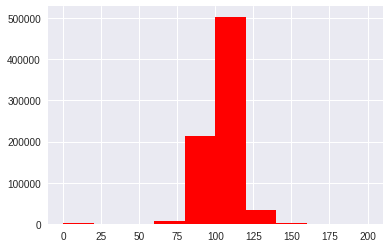

In [11]:
import seaborn as sns
#Visualising trade_price of trades
trades.trade_price.hist(range=(0,200),color="red")

### Summary
#### +Trade price lies in between 80 to 125 dollars.
#### +Shows peakedness.

In [13]:
#skewness and kurtosis
print("Skewness: %f" % trades['trade_price'].skew())
print("Kurtosis: %f" % trades['trade_price'].kurt())

Skewness: -1.314060
Kurtosis: 17.924970


### Summary
#### It almost symmetric in distribution but is heavy-tailed.

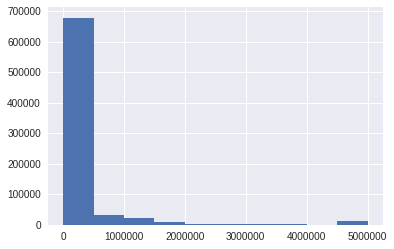

In [14]:
#Visualising trade size(notional amount) at which trade occured
trades.trade_size.hist()

In [15]:
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

In [16]:
trades = remove_outliers(df = trades, column = "trade_size", min_val = 0, max_val = 3000000)
trades['trade_size'].fillna(-1, inplace = True)
print("Fixing trade_price  column...completed")

Fixing trade_price  column...completed


### Summary
### Used plot histogram as it suits the large data sets rather than boxplot which is fine for small data sets.
#### 90% of the trades have smaller size than 500,000 and there exists some large trade sizes. we need to remove outliers.

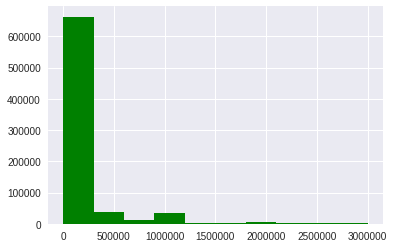

In [17]:
#Visualising trade size(notional amount) at which trade occured after removing outliers
trades.trade_size.hist(color='green')

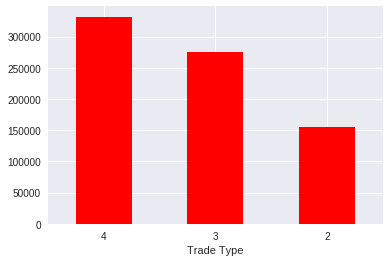

In [18]:
#Visualising trade type of trades
trades.trade_type.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('Trade Type')
sns.despine()

### Summary
#### 22% of the customers sells(2), 33% of the customers buys(3), 44% of trade happen between dealers(4). So much concentration can be laid on dealer part than the other.

#### Author - Anoop Ron
#### USN - 01FE15BCS030

### Used plot histogram as it suits the large data sets visualization rather than other plots. 

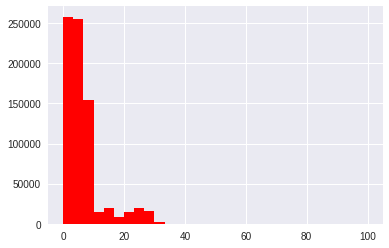

In [19]:
#Visualising time 0f maturity of trades
trades.time_to_maturity.hist(bins=30,range=(0,100),color="red")

### Summary
#### The time of maturity is less than 30 years for 98% of the bonds.

### Used plot histogram as it suits the large data sets rather than boxplot which is not as good for visualization.

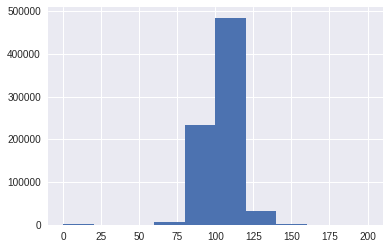

In [20]:
#Visualising curve_based_price of trades
trades.curve_based_price.hist(range=(0,200))

### There are few outliers we need to remove

In [21]:
df_trades = remove_outliers(df = trades, column = "curve_based_price", min_val = 50, max_val = 170)
df_trades["curve_based_price"].fillna(-1, inplace = True)
print("Fixing curve_based_price  column...completed")

Fixing curve_based_price  column...completed


### Used plot histogram as it suits the large data sets rather than boxplot which is not as good for visualization.

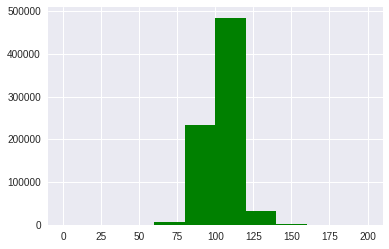

In [22]:
#Visualising curve_based_price of trades after removing outliers
trades.curve_based_price.hist(range=(0,200),color="green")

### Summary
#### After removing outliers
#### Curve based price is almost in the range of trade price graph.

### Used plot histogram as it suits the large data sets rather than boxplot which is not as good for visualization.

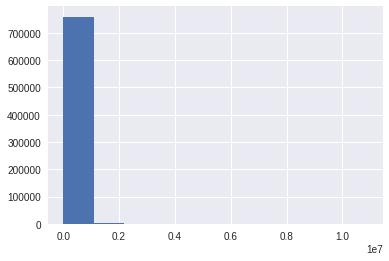

In [23]:
#Visualising recieved time difference last at which first transaction of the trade
trades.received_time_diff_last1.hist()

### Summary
#### We infer that about 99% of trades are uploaded within 850 seconds of the previous transaction. So we need to predict trade price early and get paid.

#### Author - Abhishek Patil
#### USN - 01FE15BCS006

### Bar Plot is best choosed because the no. of values for attributes are less for visualisation. 

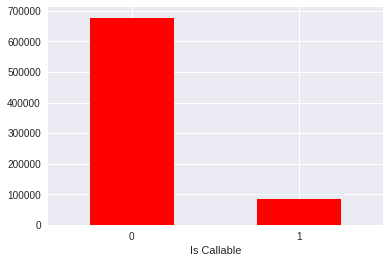

In [24]:
#Visualising the whether bond is callable or not
trades.is_callable.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('Is Callable')
sns.despine()

### Summary
#### 0 indicates the bond is not callable and 1 indicates that the bond is callable. So we infer that about 90% of the bonds are not callable.

### Used plot histogram as it suits the large data sets rather than boxplot which is not as good for visualization.

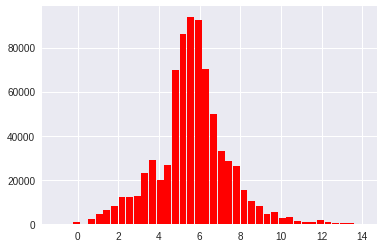

In [25]:
#Visualising the current coupon
trades.current_coupon.hist(label='Histogram',bins=40,range=(-1,14),rwidth=0.9,stacked=True,color="red")
#plt.xlabel('Current Coupon')
#sns.despine()

### Summary
#### The current coupon visualisation infers that most of the coupons lie in between 4.3 to 6.3.

### Used plot histogram as it suits the large data sets rather than boxplot which is not as good for visualization.

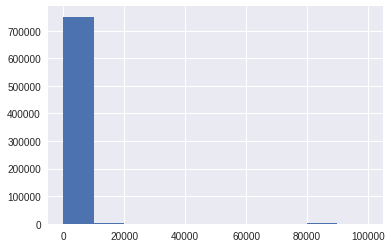

In [26]:
#Visualising the reporting delay
trades.reporting_delay.hist(range=(-5.858100e+01,9.987914e+04))

### Summary
#### We see that most of the values are clustered to left and some outliers exist.

In [27]:
trades = remove_outliers(df = trades, column = "reporting_delay", min_val = 0, max_val = 20000)
trades['reporting_delay'].fillna(-1, inplace = True)
print("Fixing reporting delay column...completed")


Fixing reporting delay column...completed


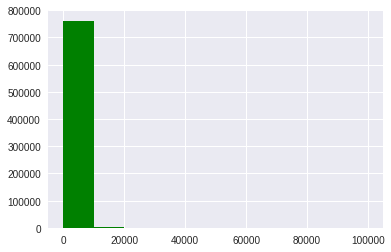

In [28]:
#Visualising the reporting delay
trades.reporting_delay.hist(range=(-5.858100e+01,9.987914e+04),color="green")

# Relation between the trade price and other variables

## Correlation matrix because we will be able to visualize all the attributes against the dependent attributes.

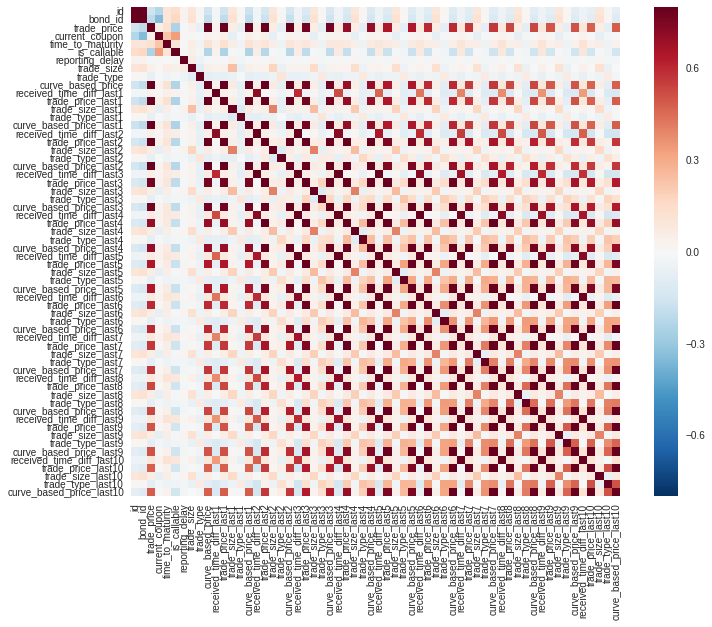

In [31]:
#correlation matrix
corrmat = trades.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True); #vmax is the maximum limit of correlation

## Summary
### Maximum correlation is 0.8 ,we are considering those attributes having correlation greater than 0.5.
### Because attributes having higher correlation are  linearly proportinonal.
 ### Curve_based_price,trade_price_last1,curve_based_price_last1,curve_based_price_last2,curve_based_price_last3,curve_based_price_last4,trade_price_last1,trade_price_last2,trade_price_last3,trade_price_last4 are strongly corelated with the trade prices with value 0.5, there is also coorelation among last 6 trade_price,curve_based_prices.

### Used plot boxplot as it suits to know all the statistical parameters.

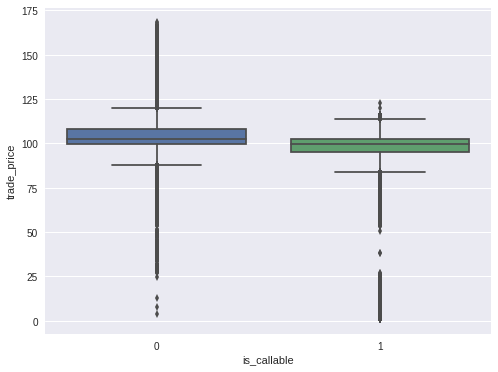

In [32]:
#box plot is_callable/trade_price
var = 'is_callable'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="trade_price", data=data)

## Summary
### 90% of the bonds with trade_price higher than 103 dollars are non_callable.

### Used plot scatter as it shows type of correlation.

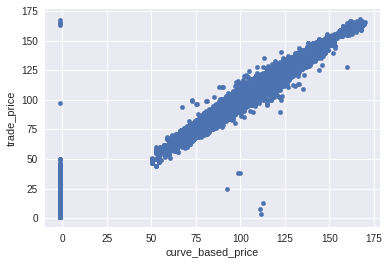

In [33]:
#scatter plot curve_based_price/trade_price
var = 'curve_based_price'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');

## Summary
### Curve based price and trade price are positively corelated but some times zero credit will be shared between each other.

### Used plot scatter as it shows type of correlation.

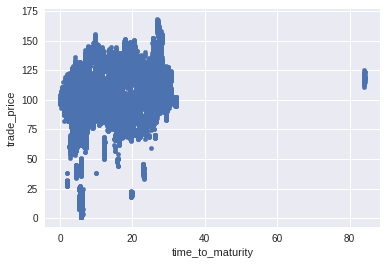

In [34]:
#scatter plot is_time_of_maturity/trade_price

var = 'time_to_maturity'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');

## Summary
### It seems there is no coorelation between trade price as such.

### Used plot scatter as it shows type of correlation.

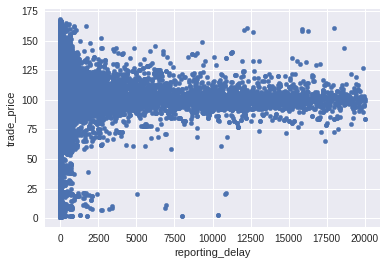

In [35]:
#scatter plot curve_based_price/trade_price
var = 'reporting_delay'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');

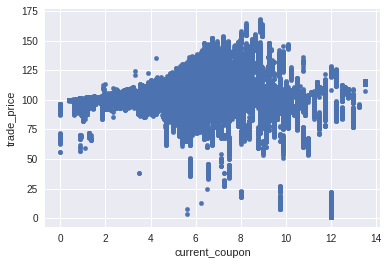

In [36]:
#scatter plot curve_based_price/trade_price
var = 'current_coupon'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');

## Summary
### It seems there is no coorelation between trade price as such.

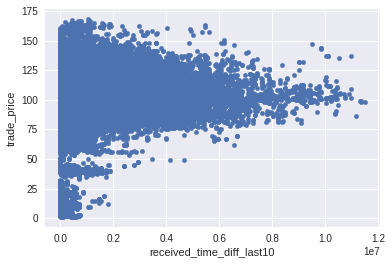

In [37]:
#scatter plot curve_based_price/trade_price
var = 'received_time_diff_last10'
data = pd.concat([trades['trade_price'], trades[var]], axis=1)
data.plot.scatter(x=var, y='trade_price');


## Summary
### Received time difference is weakly correlated

# Building linear model
### Data Modelling

## Considering the attributes which are coorelated with trade_price,

In [54]:
attributes = ['is_callable','curve_based_price_last1','curve_based_price_last2','curve_based_price_last3','curve_based_price_last4','curve_based_price_last5','curve_based_price','trade_price_last1','trade_price_last2','trade_price_last3','trade_price_last4']
training_data=trades
testing_data=df_test
training_data.set_index('id', inplace=True)


i=training_data.shape[0]
training_data = training_data[:i]

yy = training_data['trade_price']
XX = training_data.drop(attributes, axis=1, inplace=False)


In [91]:
models = []
score = []

## XGBoost Regression

In [63]:
import xgboost as xg

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2,  
                                                    random_state=42)


max_depth = 3
min_child_weight = 10
subsample = 0.5
colsample_bytree = 0.6
objective = 'reg:linear'
num_estimators = 1000
learning_rate = 0.3

features = X_train
target = y_train
mdl = xg.XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)
mdl.fit(features, target)

predicted = mdl.predict(X_test)

models.append("XGBRegressor")
score.append(explained_variance_score(y_test,predicted) )

explained_variance_score(y_test , predicted)

0.99994445813564559

## Training the Model with XGBoost Regression since we are predicting the trade_price. 

In [56]:
predicted=mdl.predict(X_test)
list(predicted)

[109.49553,
 101.45741,
 100.35221,
 108.44855,
 99.758209,
 100.51539,
 99.975502,
 98.88694,
 106.02942,
 109.81221,
 106.80433,
 99.779037,
 130.438,
 122.45109,
 106.34393,
 104.93732,
 95.709511,
 100.26275,
 100.07904,
 132.78534,
 107.00229,
 101.94651,
 114.59534,
 100.49796,
 109.8894,
 99.803085,
 100.0975,
 89.964432,
 102.00167,
 95.953644,
 99.714394,
 96.687492,
 103.28519,
 101.90172,
 107.0085,
 111.69444,
 119.15935,
 94.684464,
 103.21076,
 104.59386,
 100.083,
 90.637505,
 97.018051,
 104.659,
 101.41308,
 105.57718,
 98.235825,
 85.073524,
 101.01505,
 103.22581,
 100.94723,
 130.69771,
 103.54622,
 117.52084,
 105.47607,
 101.88354,
 100.99751,
 98.534309,
 107.14856,
 101.42702,
 111.7247,
 126.32877,
 100.90658,
 106.77384,
 100.741,
 95.335243,
 100.23388,
 100.70686,
 99.721718,
 103.43801,
 99.968163,
 111.77412,
 101.75396,
 105.00418,
 107.73445,
 105.57542,
 98.182861,
 95.02562,
 104.0251,
 106.41364,
 104.37746,
 104.36245,
 104.0774,
 116.38838,
 110.962

### Predicted trade_prices for the test data given. 

### The variance score obtained here is 0.990049

## Linear Regression Model 

In [102]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.4,  
                                                    random_state=42)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_train,y_train)

predicted1 = reg.predict(X_test)

from sklearn.metrics import explained_variance_score

models.append("LinearRegression")
score.append(explained_variance_score(y_test,predicted1) )

explained_variance_score(y_test,predicted1)

1.0

## Decision Tree Regressor 

In [96]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.33,  
                                                    random_state=42)

from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

predicted3_1 = regr_1.predict(X_test)
predicted3_2 = regr_2.predict(X_test)

from sklearn.metrics import explained_variance_score

models.append("DecisionTree")
score.append(explained_variance_score(y_test,predicted3_1) )

explained_variance_score(y_test,predicted3_1)

0.73358361841795661

## Ridge Regression Model 

In [97]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.4,  
                                                    random_state=40)
from sklearn import linear_model
reg1 = linear_model.Ridge (alpha = .5)
reg1.fit (X_train,y_train)

predicted2 = reg1.predict(X_test)

from sklearn.metrics import explained_variance_score

models.append("Ridge Linear Regression")
score.append(explained_variance_score(y_test,predicted2) )
explained_variance_score(y_test,predicted2)

0.99999999999999956

## Lasso Linear Regression Model 

In [98]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.4,  
                                                    random_state=40)
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=.5)
lassoreg.fit (X_train,y_train)

predicted_lasso = lassoreg.predict(X_test)

from sklearn.metrics import explained_variance_score

models.append("Lasso Linear Regression")
score.append(explained_variance_score(y_test,predicted_lasso) )
explained_variance_score(y_test,predicted_lasso)

0.99997116756649429

## Analysing various model performances 

In [105]:
model_all=pd.DataFrame(index=[1,2,3,4,5])

In [106]:
model_all['Model'] = models
model_all['Score'] = score
model_all.set_index('Model')

,Score
Model,
XGBRegressor,0.999949
DecisionTree,0.733584
Ridge Linear Regression,1.000000
Lasso Linear Regression,0.999971
LinearRegression,1.000000


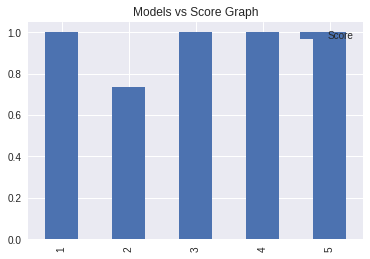

In [110]:
model_all.plot(title="Models vs Score Graph",kind="bar")

## All the models provide the same best possible results except DecisionTree Regression. 